# Astro 9

# Lecture 9: Intro to Statistics in Python

In [1]:
#standard preamble
import numpy as np
import matplotlib.pyplot as plt

We're going to add some more new packages to our preamble this week

In [2]:
import scipy as sp
from scipy import stats

In [3]:
x = np.loadtxt('sample.dat')
print('Number of samples =',len(x))

Number of samples = 54


Mean = 4.6
Median = 5.0
Mode = 6.0
Mode from SciPy = 6.0
Standard deviation = 2.7


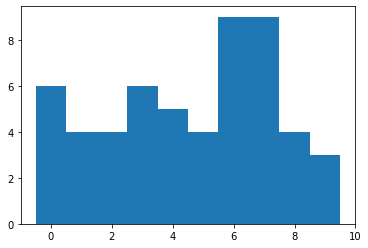

In [4]:
bins = np.arange(-0.5,10.5,1)
n, b, p = plt.hist(x, bins)

# various measures of "average value":
print ('Mean = {0:3.1f}'.format(np.mean(x)))
print ('Median = {0:3.1f}'.format(np.median(x)))
print ('Mode = {0:3.1f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))
mode, count = sp.stats.mode(x)
print('Mode from SciPy = {0:3.1f}'.format(mode[0]))

# measure of the spread
print ('Standard deviation = {0:3.1f}'.format(np.std(x)))

Mean = 198.56
Median = 198.32
Mode = 197.45
Standard deviation =  26.0


/tmp/ipykernel_106/3698801310.py:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print ('Mean = {0:5.2f}'.format(sp.mean(x)))
/tmp/ipykernel_106/3698801310.py:11: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  print ('Median = {0:5.2f}'.format(sp.median(x)))


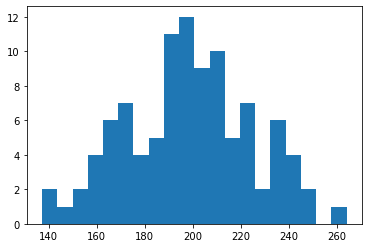

In [5]:
# create a set of data and compute mean and variance
# This creates an array of 100 elements, 
# gaussian-distributed with mean of 200 and RMS of 25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(100)
n, bins, patches = plt.hist(x, 20)

# various measures of "average value":
print ('Mean = {0:5.2f}'.format(sp.mean(x)))
print ('Median = {0:5.2f}'.format(sp.median(x)))
print ('Mode = {0:5.2f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])))

# measure of the spread
print ('Standard deviation = {0:5.1f}'.format(np.std(x)))

### Central limit theorem

Central limit theorem states that if you have any PDF (probability density function) with mean $\mu$ and variance $\sigma^2$, and you draw $N$ samples $\{ x_i \},\ i=[1..N]$ from the distribution, the PDF of the <b>sample mean</b>
$$
\mu_s = \frac{1}{N}\sum_{i=1}^N x_i
$$
approaches Gaussian with mean $\langle \mu_s\rangle = \mu$ and variance 
$\sigma_s^2 = \sigma^2/N$ when $N\to\infty$

Let's look at the example. Take the data collected in class:

$$N=54$$
$$f(x_i) = \frac{1}{10}, x_i\in[0..9]$$

In [6]:
# compute mean and sigma of the parent distribution

mu = 0
sigma = 0
prob = 1./10.
for i in range(0,10):
    mu += prob*i
print('mu = {0:4.2f}'.format(mu))

for i in range(0,10):
    sigma += prob*(i-mu)**2
sigma = np.sqrt(sigma)
print('sigma = {0:4.2f}'.format(sigma))
print('As an exercise for the reader, prove that sigma = ',10/np.sqrt(12))

mu = 4.50
sigma = 2.87
As an exercise for the reader, prove that sigma =  2.886751345948129


## Monte Carlo Techniques

### Example: coin flip

In [8]:

outcomes = ('Heads','Tails')

def flip():
    if np.random.random() > 0.5:
        return outcomes[1]
    
    return outcomes[0]

for i in range(3):
    print (flip())

Heads
Heads
Tails


### Example: dice roll

4
4
4
6
1


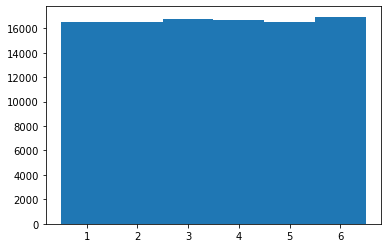

In [9]:
def dice():
    return int(np.random.random()*6)+1

for i in range(5):
    print (dice())

x = [dice() for i in range(100000)]
n, bins, patches = plt.hist(x,6,(0.5,6.5))

### Example: Deck of Cards

In [10]:
import random
import itertools
SUITS = 'cdhs'
RANKS = '23456789TJQKA'
DECK = tuple(''.join(card) for card in itertools.product(RANKS, SUITS))
hand = random.sample(DECK, 5)
print (hand)

['4s', 'Ad', '4c', '3d', '9d']


### Example:  Linear Congruent Generator

In [11]:
myRandomSeed = 504
def myRandom(a=65539, b=0, c=int(2**31-1)):
    global myRandomSeed
    x = (a*myRandomSeed+b) % c
    myRandomSeed = x
    return x

out = ""
for i in range(5):
    out += str(myRandom())
    out += " "
    
print (out)
    
out = ""
myRandomSeed = 1
for i in range(20):
    out += str(myRandom(a=5, b=3, c=8))
    out += " "

print (out)

33031656 198186408 957896856 65108986 127826865 
0 3 2 5 4 7 6 1 0 3 2 5 4 7 6 1 0 3 2 5 


### Example: Python Random Numbers

In [12]:
# integer random number between [a..b]
print (np.random.randint(0,2**32-1))

1544292231


In [13]:
# float random number between [0..1)
print (np.random.random())

0.9110350709128797


In [14]:
# float random number between [a..b)
print (np.random.uniform(5,10))

7.98269840149627


In [15]:
# Choose a random element
print (np.random.choice(['a','b','c','d','e','f','g','h','i','j'])) 

e


/tmp/ipykernel_106/259991487.py:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.3f}'.format(sp.mean(ds)))
/tmp/ipykernel_106/259991487.py:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))


Mean = 7.500
Std. dev. = 1.443


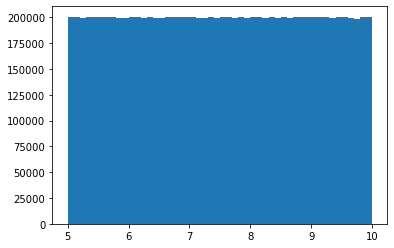

In [17]:
# plot distribution
ds = np.random.uniform(5,10,size=10000000)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50)
plt.show()

### Example: Python random number generators

/tmp/ipykernel_106/3425008628.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.3f}'.format(sp.mean(ds)))
/tmp/ipykernel_106/3425008628.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))


Mean = 3.997
Std. dev. = 3.991


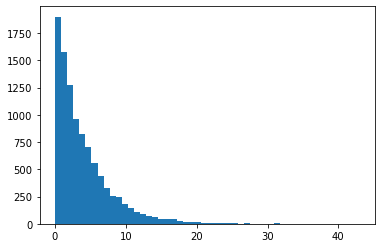

In [19]:
ds = np.random.exponential(scale=4,size=10000)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50)
plt.show()

Mean = -0.403
Std. dev. = 6.643


/tmp/ipykernel_106/3258333985.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.3f}'.format(sp.mean(ds)))
/tmp/ipykernel_106/3258333985.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))


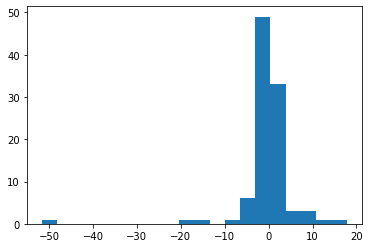

In [20]:
ds = np.random.standard_cauchy(size=100)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,20)
plt.show()

/tmp/ipykernel_106/2453988183.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print('Mean = {0:5.3f}'.format(sp.mean(ds)))
/tmp/ipykernel_106/2453988183.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))


Mean = 9.996
Std. dev. = 2.040


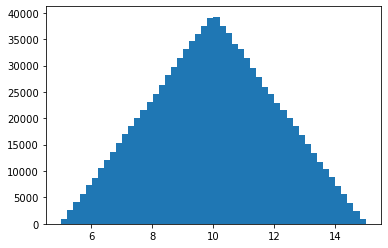

In [22]:
ds = np.random.triangular(5,10,15,size=1000000)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50)
plt.show()